In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, 2*X_inliers - 2]

In [3]:
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

In [4]:
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [5]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [6]:
y_pred = clf.fit_predict(X) #1,-1로 나온다.
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

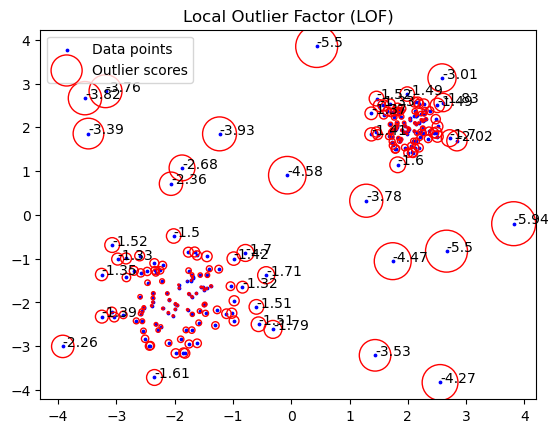

In [7]:
#fig, ax = plt.subplots()
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='b', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) #오홍 minmax scaling으로 radius를 정햇네
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
n=np.copy(X_scores)
n[n>-1.3]=np.nan
n=np.round(n,2)
for i, txt in enumerate(n):
    if np.isnan(txt):continue
    plt.annotate(txt, (X[i,0], X[i,1]))
legend = plt.legend(loc='upper left')
plt.show()